In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,NaN,NaN,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0


<Axes: >

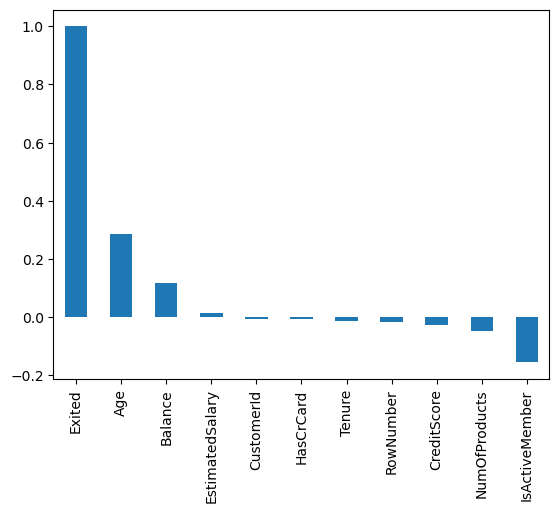

In [8]:
df.corr(numeric_only=True)["Exited"].sort_values(ascending=False).plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\327179096.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df["Age"][(df["Exited"]==0)], color = "red", shade = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\327179096.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df["Age"][(df["Exited"]==1)], color = "blue", shade = True)


NameError: name 'Tot' is not defined

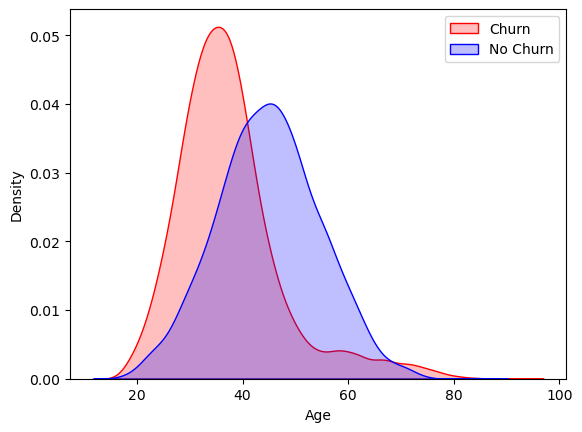

In [11]:
tot = sns.kdeplot(df["Age"][(df["Exited"]==0)], color = "red", shade = True)
tot = sns.kdeplot(df["Age"][(df["Exited"]==1)], color = "blue", shade = True)
tot.legend(["Churn","No Churn"],loc="upper right")
Tot.set_ylabel("Count")
Tot.set_xlabel("Surname")
Tot.set_title("Customer by churn")

In [12]:
df.Age.min()

18.0

In [13]:
df.Age.max()

92.0

In [14]:
labels = ['0-20','21-40','41-60','60 above']
bins = [0,20,40,60,100]

df['Age-bins'] = pd.cut(df.Age,bins,labels=labels,include_lowest=True)

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age-bins
0,1,15634602,Hargrave,619,France,NaN,NaN,2,0.00,1,1,1,101348.88,1,NaN
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0,NaN


In [20]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [21]:
df["Gender"] = df["Gender"].fillna("Male")

In [22]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                10
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
Age-bins           10
Gender-label        0
dtype: int64

In [23]:
from sklearn import preprocessing

In [24]:
le = preprocessing.LabelEncoder()
df["Gender-labels"] = le.fit_transform(df["Gender"])

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age-bins,Gender-label,Gender-labels
0,1,15634602,Hargrave,619,France,Male,NaN,2,0.00,1,1,1,101348.88,1,NaN,2,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60,0,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60,0,0
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40,0,0
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0,NaN,0,0


In [27]:
df.drop(columns=["Gender-label"],inplace=True)

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age-bins,Gender-labels
0,1,15634602,Hargrave,619,France,Male,NaN,2,0.00,1,1,1,101348.88,1,NaN,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-60,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-60,0
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,21-40,0
4,5,15737888,Mitchell,850,Spain,Female,NaN,2,125510.82,1,1,1,79084.10,0,NaN,0


In [29]:
df_dummy = pd.get_dummies(df,dtype=int)
df_dummy.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age-bins_0-20,Age-bins_21-40,Age-bins_41-60,Age-bins_60 above
0,1,15634602,619,NaN,2,0.00,1,1,1,101348.88,...,0,1,0,0,0,1,0,0,0,0
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,...,0,0,0,1,1,0,0,0,1,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,...,0,1,0,0,1,0,0,0,1,0
3,4,15701354,699,39.0,1,0.00,2,0,0,93826.63,...,0,1,0,0,1,0,0,1,0,0
4,5,15737888,850,NaN,2,125510.82,1,1,1,79084.10,...,0,0,0,1,1,0,0,0,0,0
